---
# 💸 Payroll Data Analysis || Creating A Model to Predict Salary

---

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Data and Preprocessing

## Context
The Los Angeles City Controller Office releases payroll information for all city employees on a quarterly basis since 2013.

## Content
Data includes department titles, job titles, projected annual salaries (with breakdowns of quarterly pay), bonuses, and benefits information.

## Inspiration
1. How do benefits and salaries differ for employees across departments and titles? Are there any unusually large differences between lowest and highest employee salaries?
2. How have salaries changed over the past three years?
3. Have the costs of benefits changed dramatically since the passing of the Affordable Care Act?
4. What is the most common government role in Los Angeles?

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 35)

In [10]:
df_data=pd.read_csv('data-payroll.csv')

In [11]:
df_data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24.0,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24.0,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12.0,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3.0,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


There are a few salary & payments & cost columns have '$' signs and thus are not numbers. Let's remove the sign and convert column into numbers

In [12]:
for item in df_data.columns[df_data.dtypes=='object']:
    df_data[item]=df_data[item].str.replace('$','')

    #Note df_data.replace('$','',inplace=True) wont work because it need to match the string exactly to replace,partial match of $ doesn't count as exact match and won't work
    #https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
df_data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,NaN,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67%,74584.48,60310.57,0.00,0.00,0.00,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,NaN,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43%,51207.45,49507.05,1269.83,0.00,239.20,0.00,11.13,180.24,1689.27,NaN,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,NaN,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85%,89029.61,84909.41,1954.51,0.00,1519.00,0.00,482.29,164.40,3637.91,NaN,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,NaN,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76%,71936.24,57660.80,0.00,1585.72,935.00,0.00,11504.72,250.00,2770.72,NaN,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,NaN,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74%,64583.37,59391.75,0.00,4774.25,0.00,0.00,417.37,0.00,4774.25,NaN,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


We will only use the annual salary data and base pay this time and converting it to float dtypes

In [13]:
df_data['Projected Annual Salary']=df_data['Projected Annual Salary'].astype('float')
df_data['Base Pay']=df_data['Base Pay'].astype('float')
df_data['Q1 Payments']=df_data['Q1 Payments'].astype('float')
df_data['Q2 Payments']=df_data['Q2 Payments'].astype('float')
df_data['Q3 Payments']=df_data['Q3 Payments'].astype('float')
df_data['Q4 Payments']=df_data['Q4 Payments'].astype('float')

In [14]:
print(df_data.shape)
print(df_data.columns)
df_data.describe()

(285008, 35)
Index(['Row ID', 'Year', 'Department Title', 'Payroll Department',
       'Record Number', 'Job Class Title', 'Employment Type',
       'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
       '% Over Base Pay', 'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'MOU', 'MOU Title', 'FMS Department',
       'Job Class', 'Pay Grade', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan',
       'Job Class Link'],
      dtype='object')


,Row ID,Year,Payroll Department,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Base Pay,FMS Department,Job Class
count,285008.000000,285008.000000,231463.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,4557.472067,79988.907774,21169.158377,16965.394664,12309.946189,12570.132810,51639.946289,66.271340,3051.039967
std,82330.135857,1.161369,2508.764234,33464.231936,14131.042801,14912.208981,14431.228494,14795.702948,37989.128767,29.304236,2038.694130
min,1.000000,2013.000000,101.000000,0.000000,-2254.580000,-12607.850000,-34122.580000,-30728.270000,-3838.380000,2.000000,1.000000
25%,71252.750000,2014.000000,3001.000000,56732.530000,12371.982500,192.470000,0.000000,0.000000,19713.340000,42.000000,1960.000000
50%,142504.500000,2015.000000,4301.000000,78945.040000,21356.780000,17684.225000,4469.455000,3992.800000,46390.800000,70.000000,2234.000000
75%,213756.250000,2016.000000,7031.000000,99813.710000,28903.087500,27031.410000,23324.545000,24157.200000,83086.400000,88.000000,3580.000000
max,285208.000000,2016.000000,8702.000000,360743.760000,262966.090000,191435.350000,291317.360000,500930.740000,359361.600000,98.000000,9998.000000


In [15]:
df_data['Year'].unique()

array([2014, 2013, 2016, 2015])

In [16]:
df_2014=df_data[df_data['Year']==2014][['Year','Projected Annual Salary','Base Pay']]
df_2015=df_data[df_data['Year']==2015][['Year','Projected Annual Salary','Base Pay']]
df_2016=df_data[df_data['Year']==2016][['Year','Projected Annual Salary','Base Pay']]

# Understand data variance and distribution

In [17]:
np.var(df_2015['Projected Annual Salary'])/np.var(df_2016['Projected Annual Salary'])

1.0552695968298238

The ratio is less than 4:1 we can assue they are equal to each other

[Text(-50000.0, 0, '−50000'),
 Text(0.0, 0, '0'),
 Text(50000.0, 0, '50000'),
 Text(100000.0, 0, '100000'),
 Text(150000.0, 0, '150000'),
 Text(200000.0, 0, '200000'),
 Text(250000.0, 0, '250000'),
 Text(300000.0, 0, '300000'),
 Text(350000.0, 0, '350000'),
 Text(400000.0, 0, '400000')]

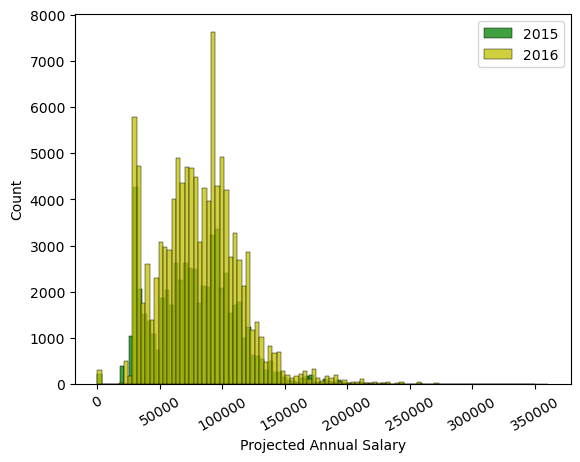

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
#fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
my_plt=sns.histplot(data=df_2015,x='Projected Annual Salary',bins=100,label='2015',color='g')
my_plt=sns.histplot(data=df_2016,x='Projected Annual Salary',bins=100,label='2016',color='y')
my_plt.legend()
my_plt.set_xticklabels(my_plt.get_xticklabels(), rotation=30)

# Two-tail test:

Null Hypothesis: 2015 average annual salary=2016 annual salary

Alternative: 2015 average annual salary!=2016 annual salary

https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

In [19]:
import scipy.stats as stats
stats.ttest_ind(a = df_2015['Projected Annual Salary'], b=df_2016['Projected Annual Salary'],equal_var=True)

TtestResult(statistic=-13.304975548078414, pvalue=2.2684603591497205e-40, df=170679.0)

In [20]:
import math
math.sqrt(1/df_2015.shape[0]+1/df_2016.shape[0])

0.005074212804042167

since p value is smaller than 0.05, we can reject H0 and conclude that 2015 average annual salary is different from 2016 average salary

In [21]:
!pip install pingouin


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import pingouin as pg

pg.ttest(df_2015['Projected Annual Salary'], df_2016['Projected Annual Salary'],correction=True)

#Here we have the same conclusion as above and the 2015 mean is not the same as 2016 mean

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-13.19817,119584.521675,two-sided,9.584232e-40,"[-2608.57, -1933.98]",0.067512,3.632e+35,1.0


# One tail test: 

Hypothesis Test: 2015 average annual income = 2016 average annual income

Alternative: 2015 average annual income<2016 average annual income

https://analystprep.com/cfa-level-1-exam/quantitative-methods/t-test-z-test/

In [23]:
print(df_2015['Projected Annual Salary'].mean())
print(df_2016['Projected Annual Salary'].mean())

79089.18237723158
81360.45703671314


In [24]:
stats.ttest_ind(a = df_2015['Projected Annual Salary'], b=df_2016['Projected Annual Salary'],equal_var=True,alternative='less')

TtestResult(statistic=-13.304975548078414, pvalue=1.1342301795748602e-40, df=170679.0)

P value is less than 0.05 so we can reject the null hypothesis and accept the alternative and conclude that 2015 ave annual salary is less than 2016 ave annual salary

# ANOVA and F-Test

**One-way F-test:**

Null Hypothesis(H0): means of 2014,2015,2016 base salary are equal

Alternative(Ha): At least one mean is different
    
https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

In [25]:
stats.f_oneway(df_2014['Base Pay'], df_2015['Base Pay'], df_2016['Base Pay'] )

F_onewayResult(statistic=43817.45255817798, pvalue=0.0)

p value is almost 0 , we reject the null hypothesis and conclude that at lease one mean of base salary in yrs 2014-2016 are different

**Two way F-Test:**

In [26]:
df=df_data[['Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments']]
df.columns=['Projected_Annual_Salary', 'Q1_Payments',
       'Q2_Payments', 'Q3_Payments', 'Q4_Payments']

In [27]:
from statsmodels.formula.api import ols
Ols_multiple=ols('Projected_Annual_Salary ~ Q1_Payments+Q2_Payments+Q3_Payments+Q4_Payments ',data=df).fit()

In [28]:
import statsmodels.api as sm

print(sm.stats.anova_lm(Ols_multiple, typ=2))

                   sum_sq        df              F         PR(>F)
Q1_Payments  1.086021e+14       1.0  279182.466955   0.000000e+00
Q2_Payments  2.946620e+11       1.0     757.484810  1.565744e-166
Q3_Payments  3.143376e+09       1.0       8.080647   4.474364e-03
Q4_Payments  1.006505e+12       1.0    2587.411781   0.000000e+00
Residual     1.108663e+14  285003.0            NaN            NaN


In [29]:
Ols_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Projected_Annual_Salary   R-squared:                       0.653
Model:                                 OLS   Adj. R-squared:                  0.653
Method:                      Least Squares   F-statistic:                 1.339e+05
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             19:47:17   Log-Likelihood:            -3.2230e+06
No. Observations:                   285008   AIC:                         6.446e+06
Df Residuals:                       285003   BIC:                         6.446e+06
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.798e+04     68.373    555.456      0.000    3.78e+04    3.81e+04
Q1_Payments     1.6969      0.003    528.377      0.000       1.691       1.703
Q2_Payments     0.1160      0.004     27.522      0.000       0.108       0.124
Q3_Payments    -0.0204      0.007     -2.843      0.004      -0.035      -0.006
Q4_Payments     0.3478      0.007     50.867      0.000       0.334       0.361
==============================================================================
Omnibus:                    39763.481   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516013.829
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       9.581   Cond. No.                     7.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All 4 factors are significant(small P value). Next let's fit a linear regression and see how much the quaterly payments explain total annual pay

**Fit a linear regression model and get predictive insights:**

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Projected_Annual_Salary'],axis=1), df['Projected_Annual_Salary'], test_size=0.33, random_state=42)

Model=linear_model.LinearRegression().fit(X_train,y_train)

In [31]:
Model.score(X_test,y_test)

0.6485539385447638

The R square (0.64855) is similar to what our ANOVA table shows (0.653). 

It means the quarterly payments can explain about 65% of the annual salary value